In [ ]:
# can't use all data for memory reason, only use half
test_mode = True

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# define root directory for the script
root_dir = 'D:/OpenClassrooms/projet_5'
dataset_name = 'df_final_4'

In [ ]:
# for bigger plots
scale_factor = 2

default_size = [6.0, 4.0]
scaled_size = [scale_factor * n for n in default_size]
plt.rcParams['figure.figsize'] = scaled_size


# to see all columns when looking at a dataframe
pd.set_option('display.max_columns', None)

In [ ]:
# get data
data_path = root_dir + '/data/' + dataset_name + '.csv'
df = pd.read_csv(data_path)

test_mode_samples = 50000
if test_mode:
    df = df.sample(test_mode_samples)
    
print(df.shape)
df.head()

(50000, 25)


,customer_unique_id,M,freight_value,R,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,F
32739,5a4b4cc7bcccb91c0eba9112d7c4c8bd,109.9,21.61,508,0.0,0.0,9.0,34.0,1.0,10.0,0,1,0,0,131.51,4.0,0,0,0.0,94818.0,alvorada,RS,-30.004246,-51.054943,1
55259,98eef1a36389d4148039ece41431831a,197.5,53.73,642,0.0,0.0,15.0,27.0,1.0,3.0,0,1,0,0,251.23,4.0,0,0,5.0,11668.0,caraguatatuba,SP,-23.709727,-45.441340,1
42873,76888ec0e2d5b7de57da85ce2babccac,189.9,20.57,340,0.0,7.0,11.0,24.0,1.0,4.0,0,1,0,0,210.47,5.0,0,0,0.0,8280.0,sao paulo,SP,-23.560481,-46.473546,1
8292,16af40ec18dcd9725a9dec6ee2efb851,116.6,28.18,299,0.0,9.0,16.0,29.0,1.0,5.0,0,1,0,0,144.78,5.0,0,0,34.0,72236.0,brasilia,DF,-15.849381,-48.119870,1
23515,40f94a38b9e0e57adccb0d0b2811e56f,129.9,27.23,534,0.0,3.0,10.0,19.0,1.0,10.0,0,1,0,0,157.13,5.0,0,0,3.0,33925.0,ribeirao das neves,MG,-19.777793,-43.991248,1


In [ ]:
# make subset of the final dataframe for clustering with a model

to_keep = ['R', 
           'F', 
           'M', 
           'review_title', 
           'review_message', 
           'payment_installments', 
           'payment_sequential', 
           'nb_days_survey_respond', 
           'pay_boleto', 
           'pay_credit_card', 
           'pay_debit_card', 
           'pay_voucher', 
           'freight_value', 
           'payment_value'
          ]

data = df[to_keep]
#data = df.drop(to_drop, axis=1)

print(data.shape)
data.head()

(50000, 14)


,R,F,M,review_title,review_message,payment_installments,payment_sequential,nb_days_survey_respond,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,freight_value,payment_value
32739,508,1,109.9,0,0,10.0,1.0,0.0,0,1,0,0,21.61,131.51
55259,642,1,197.5,0,0,3.0,1.0,5.0,0,1,0,0,53.73,251.23
42873,340,1,189.9,0,0,4.0,1.0,0.0,0,1,0,0,20.57,210.47
8292,299,1,116.6,0,0,5.0,1.0,34.0,0,1,0,0,28.18,144.78
23515,534,1,129.9,0,0,10.0,1.0,3.0,0,1,0,0,27.23,157.13


In [ ]:
# data to numpy & normalize

X = data.to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
k_opti = 4

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=k_opti, 
                                linkage='ward')
'''
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=None, 
                                distance_threshold=10, 
                                linkage='single')
'''

In [ ]:
model.fit(X)

In [ ]:
pred = model.labels_

In [ ]:
from sklearn import metrics

n_clusters_ = len(set(pred)) - (1 if -1 in pred else 0)
n_noise_ = list(pred).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred))

Estimated number of clusters: 4
Silhouette Coefficient: 0.347


In [ ]:
# select columns to graph
types = ['int64', 'float64']

to_graph = []
for column in df:
    if df[column].dtypes in types:
        to_graph.append(column)

df_graph = df[to_graph]
df_graph = df_graph.drop('zip_code_prefix', axis=1)
df_graph['pred'] = pred
print(df_graph.shape)

(50000, 22)


In [ ]:
# population of each cluster
print(df_graph['pred'].value_counts())

2    32210
0     9317
3     5364
1     3109
Name: pred, dtype: int64


M :


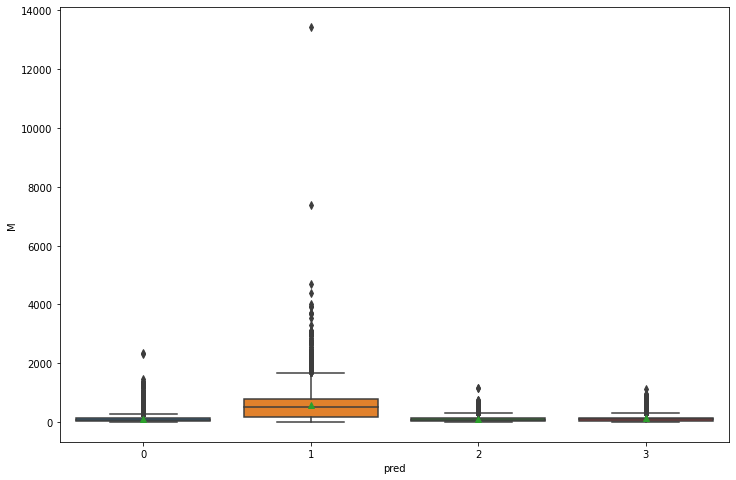





freight_value :


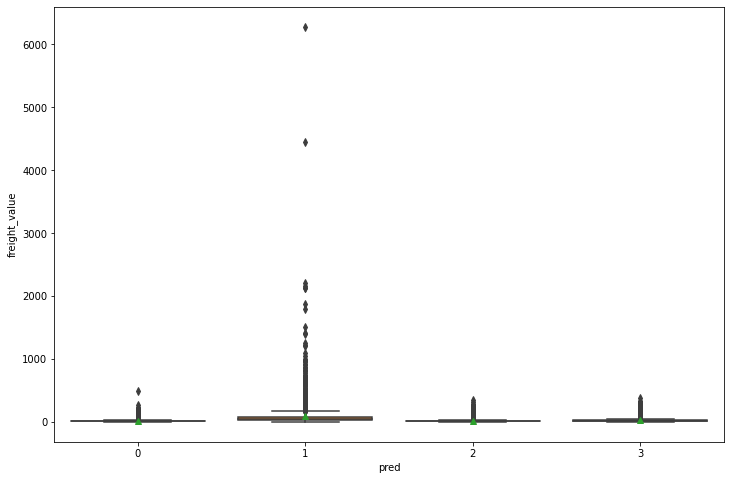





R :


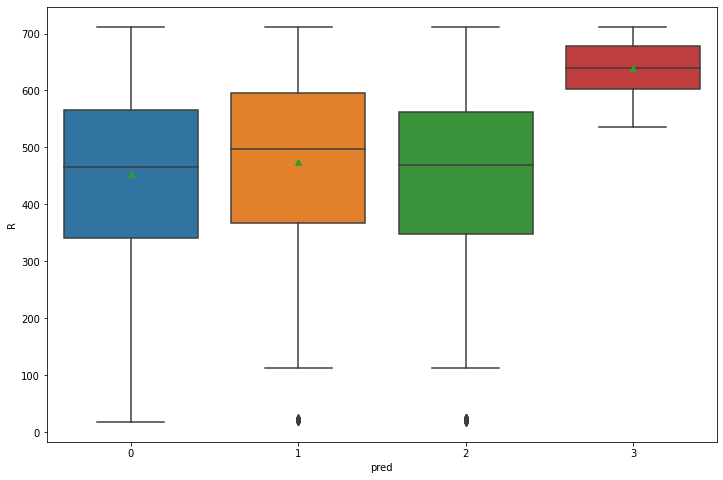





nb_days_order_approved :


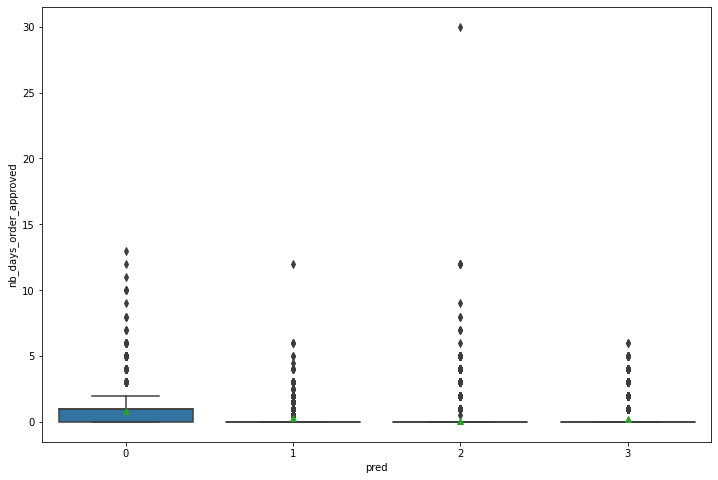





nb_days_delivered_carrier :


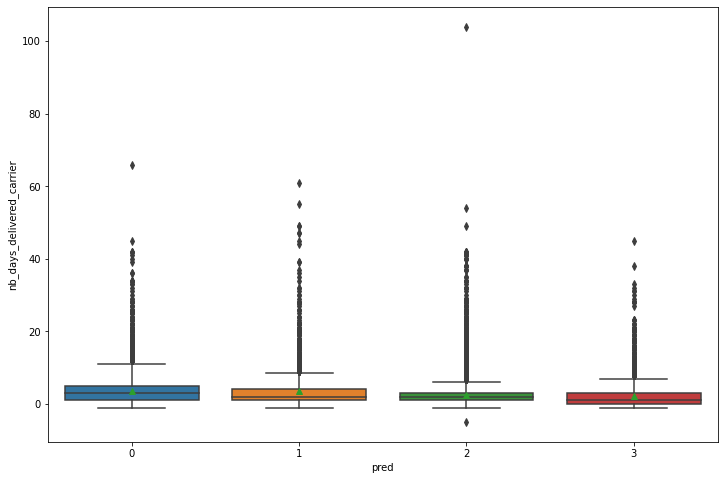





nb_days_delivered_customer :


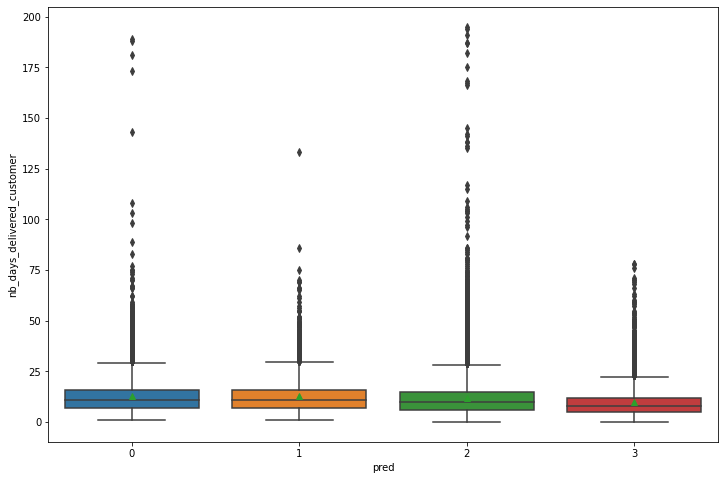





nb_days_estimate_delivery :


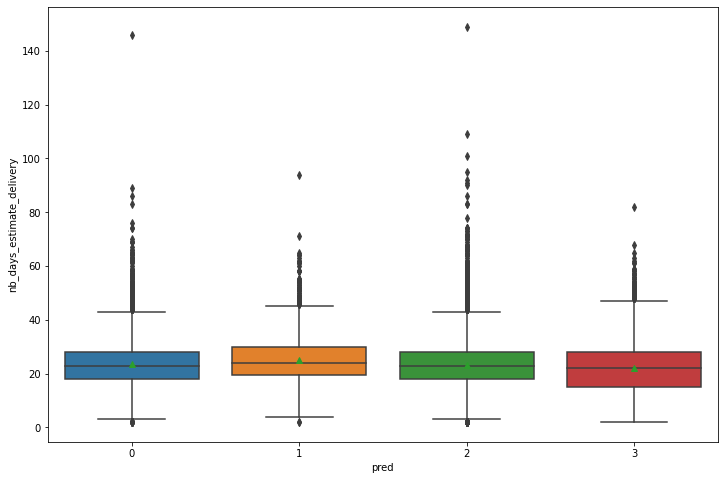





payment_sequential :


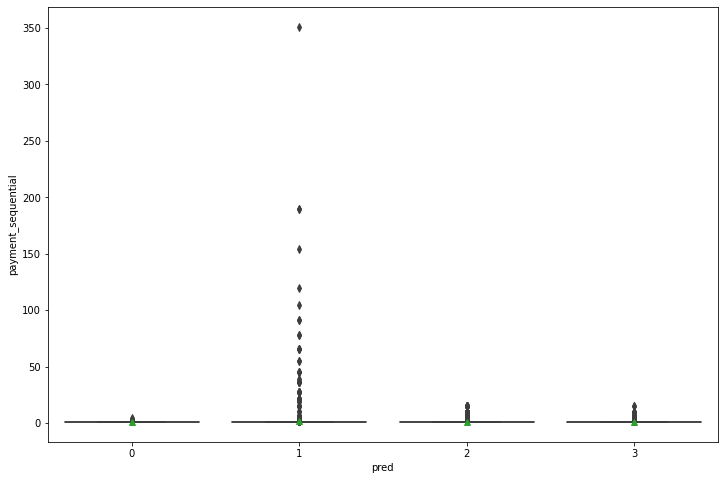





payment_installments :


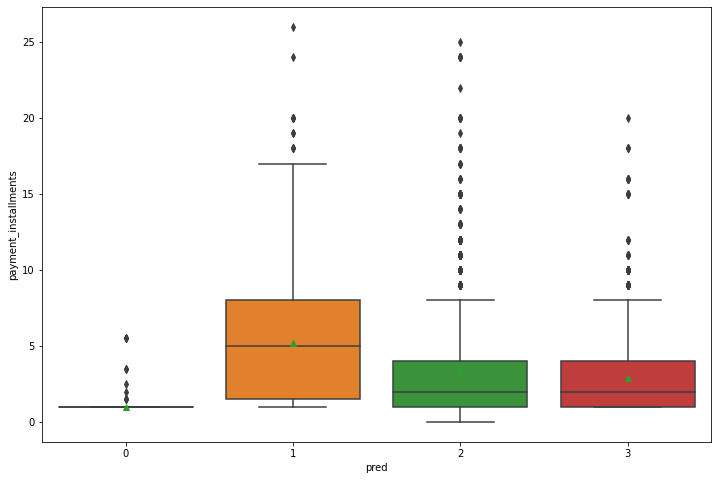





pay_boleto :


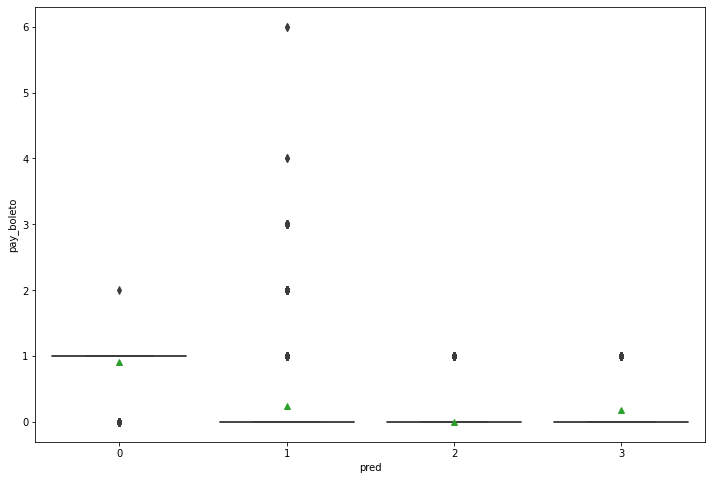





pay_credit_card :


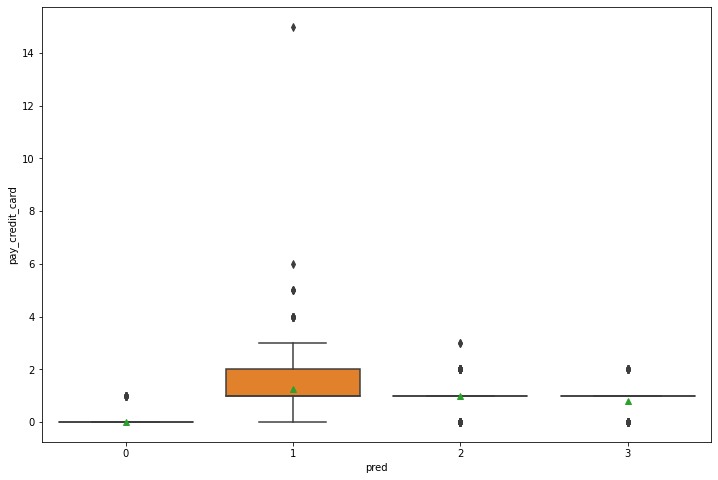





pay_debit_card :


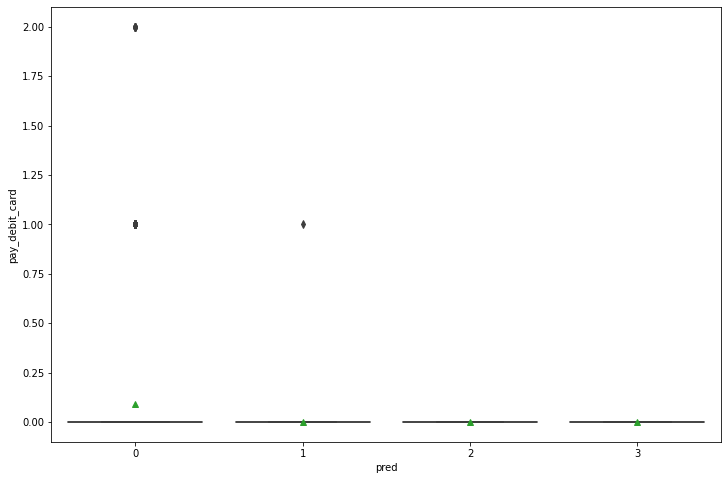





pay_voucher :


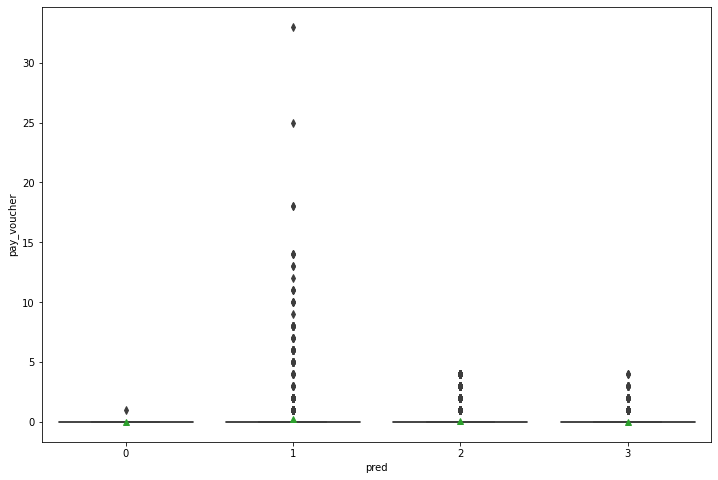





payment_value :


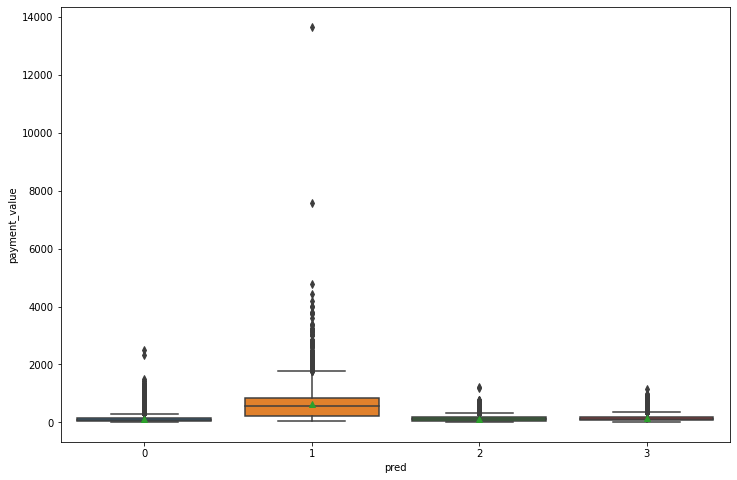





review_score :


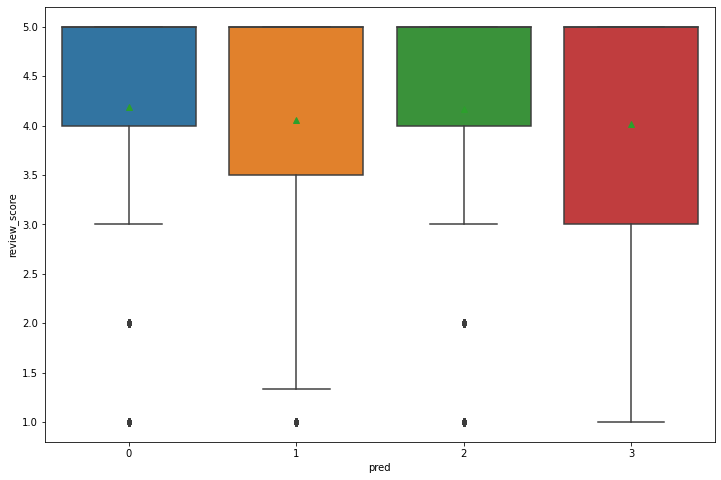





review_title :


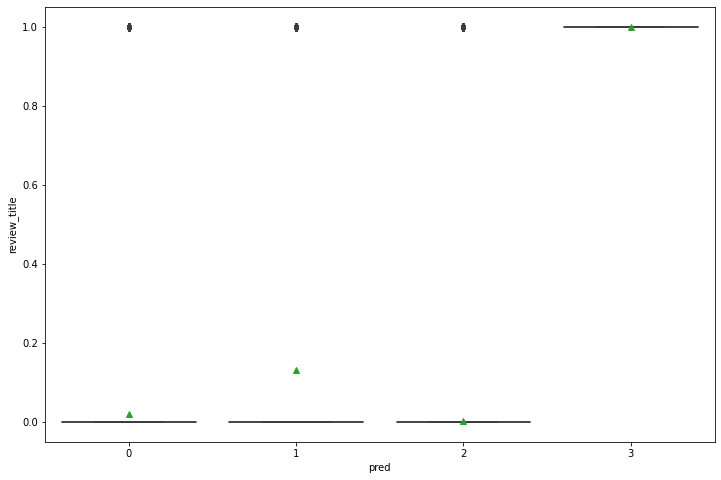





review_message :


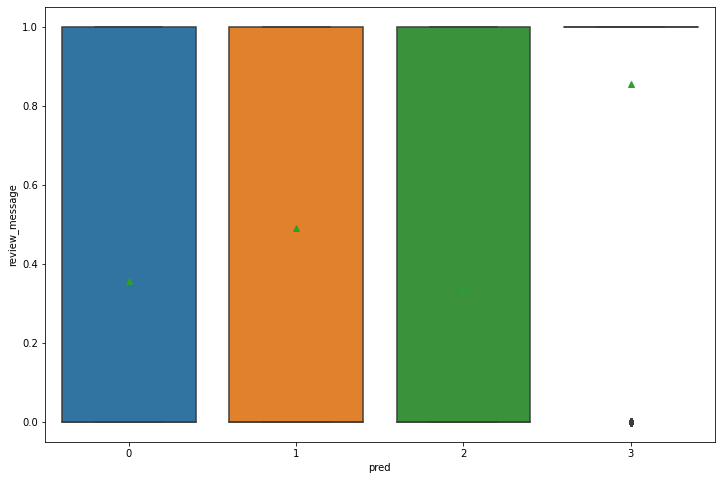





nb_days_survey_respond :


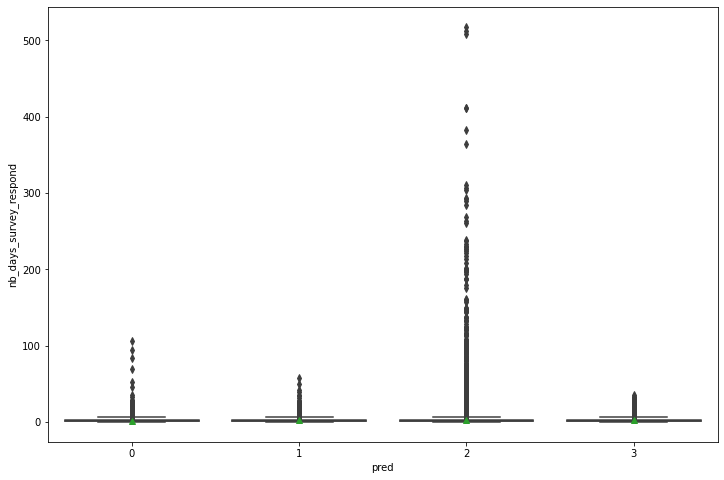





geolocation_lat :


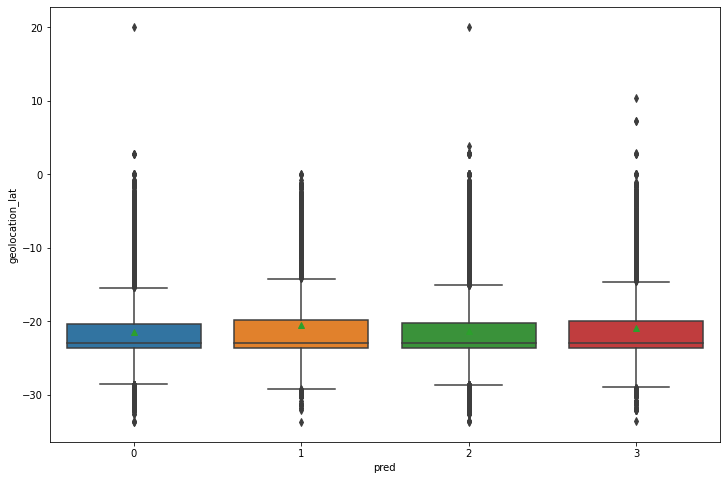





geolocation_lng :


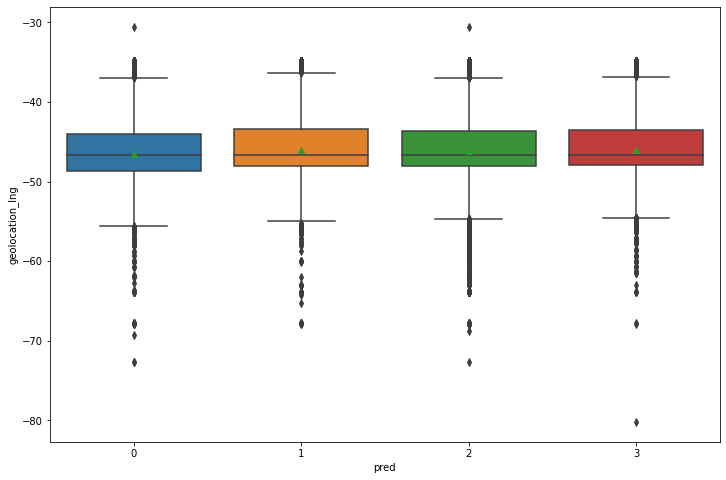





F :


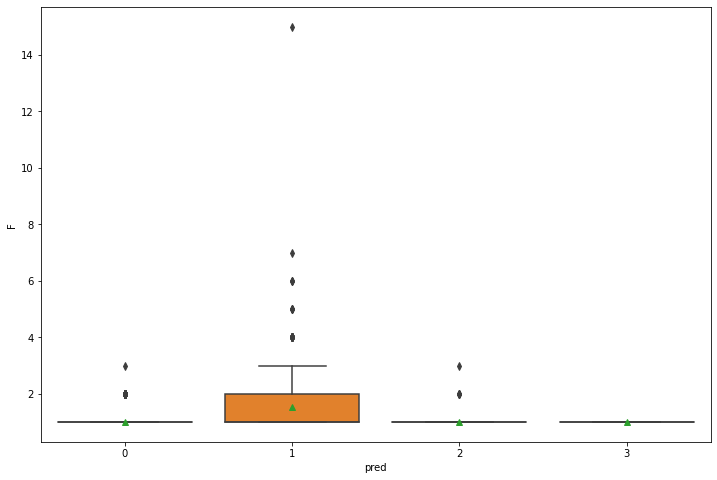





pred :


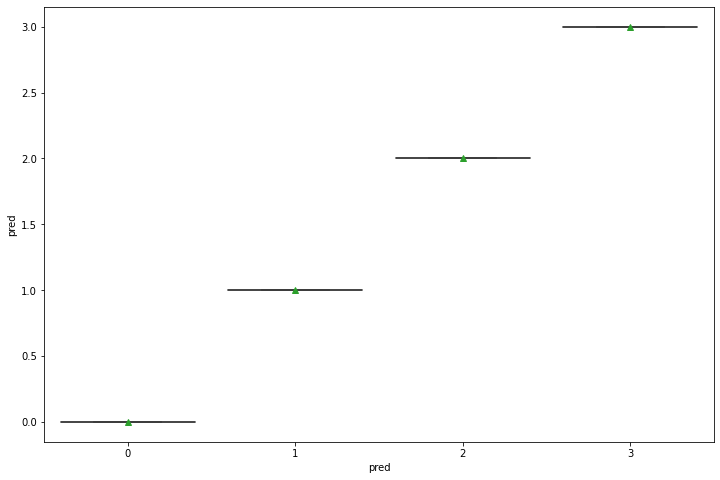

In [ ]:
for column in df_graph:
    print(column, ':')
    plt.figure()
    sns.boxplot(x='pred', y=column, data=df_graph, showmeans=True)
    plt.show()
    print('\n'*3)

In [ ]:
# clusters means
df_graph_agg = df_graph.groupby('pred', as_index=False).agg(np.mean)
df_graph_agg.head()

,pred,M,freight_value,R,nb_days_order_approved,nb_days_delivered_carrier,nb_days_delivered_customer,nb_days_estimate_delivery,payment_sequential,payment_installments,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,payment_value,review_score,review_title,review_message,nb_days_survey_respond,geolocation_lat,geolocation_lng,F
0,0,109.288617,23.593169,453.143716,0.842385,3.561071,12.970645,23.493292,1.003649,1.002415,0.911989,0.001717,0.090372,0.000107,130.434106,4.185217,0.020715,0.357733,2.005313,-21.463298,-46.552066,1.004079
1,1,586.323792,96.162136,474.895143,0.276938,3.435992,12.977967,24.994693,2.018173,5.220650,0.235767,1.256353,0.000322,0.241235,646.869768,4.052423,0.131554,0.491798,2.127050,-20.504008,-46.012641,1.518173
2,2,110.125697,22.997864,454.114343,0.101785,2.479960,11.977305,23.382645,1.098230,3.324201,0.002453,0.981745,0.000000,0.059733,130.893643,4.171117,0.001397,0.339894,2.831248,-21.256085,-46.155612,1.000217
3,3,122.897025,27.034774,639.929903,0.259881,2.230239,10.050895,22.132923,1.073639,2.924683,0.186614,0.801641,0.000000,0.043624,146.609741,4.020134,1.000000,0.853840,2.107569,-20.916370,-46.031213,1.000000
